In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import io
import torch
import cv2
from cv2 import cvtColor,COLOR_RGBA2RGB

(720, 720, 4)


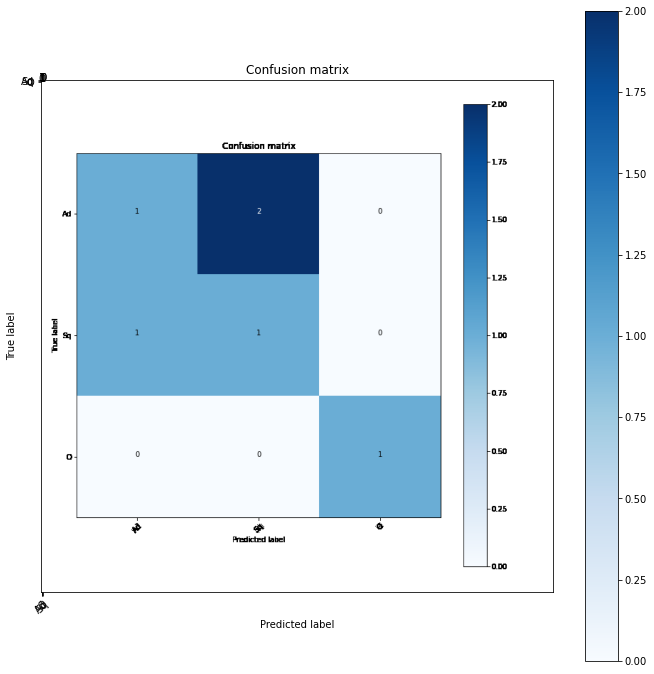

(720, 720, 3)


In [113]:


def plot_confusion_matrix(cm, class_names, normalize=True):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    # Normalize the confusion matrix.
    if normalize:

        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    
    figure = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout(pad=3)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure


def plt2arr(fig, draw=True):
    if draw:
        fig.canvas.draw()
    rgba_buf = fig.canvas.buffer_rgba()
    (w,h) = fig.canvas.get_width_height()
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h,w,4))
    
    return rgba_arr, torch.unsqueeze(torch.from_numpy(np.transpose(rgba_arr,(2,0,1))),0)

if __name__=='__main__':
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix([0, 0, 1,1,2, 0], [0, 1,0,1, 2, 1])
    figure = plot_confusion_matrix(cm, class_names=['Ad','Sq','O'],normalize=False)
    np_im,_ = plt2arr(figure)
    print(np_im.shape)
    plt.imshow( torch.from_numpy(np_im[:,:,0:3]) )
    plt.show()
    
    #rgbImage = cvtColor(np_im, COLOR_RGBA2RGB)
    print(rgbImage.shape)
    #plt.imshow(rgbImage)
    #plt.show()

In [103]:
cm

array([[1, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [14]:
np_im.min()

0

In [18]:
np.float16(np_im)/255.

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

In [49]:
Source = np.float16(np_im)/255.
rgbImage[:,:,0] = ((1 - Source[:,:,3]) * np_im[:,:,0]) + (Source[:,:,3] * Source[:,:,0])
rgbImage[:,:,1] = ((1 - Source[:,:,3]) * np_im[:,:,1]) + (Source[:,:,3] * Source[:,:,1])
rgbImage[:,:,2] = ((1 - Source[:,:,3]) * np_im[:,:,2]) + (Source[:,:,3] * Source[:,:,2])

Source[:,:,3].shape

(720, 720)

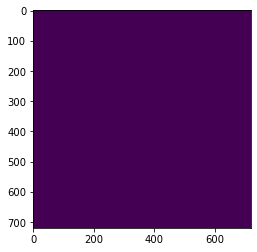

In [36]:
plt.imshow((Source[:,:,3]*255).astype(np.int8))

In [ ]:
Source => Target = (BGColor + Source) =
Target.R = ((1 - Source.A) * BGColor.R) + (Source.A * Source.R)
Target.G = ((1 - Source.A) * BGColor.G) + (Source.A * Source.G)
Target.B = ((1 - Source.A) * BGColor.B) + (Source.A * Source.B)


Source = np.float16(np_im)/255.
rgbImage[:,:,0] = ((1 - Source[:,:,3]) * np_im[:,:,0]) + (Source[:,:,3] * Source[:,:,0])
rgbImage[:,:,1] = ((1 - Source[:,:,3]) * np_im[:,:,1]) + (Source[:,:,3] * Source[:,:,1])
rgbImage[:,:,2] = ((1 - Source[:,:,3]) * np_im[:,:,2]) + (Source[:,:,3] * Source[:,:,2])

In [50]:
Source[:,:,3].max()

0.0

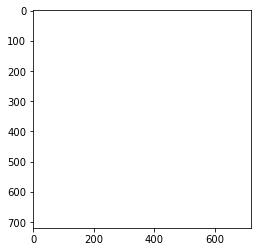

In [58]:
plt.imshow(np_im[:,:,0:3])

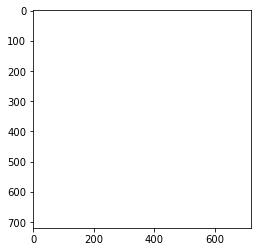

In [59]:
plt.imshow( torch.from_numpy(np_im[:,:,0:3]) )

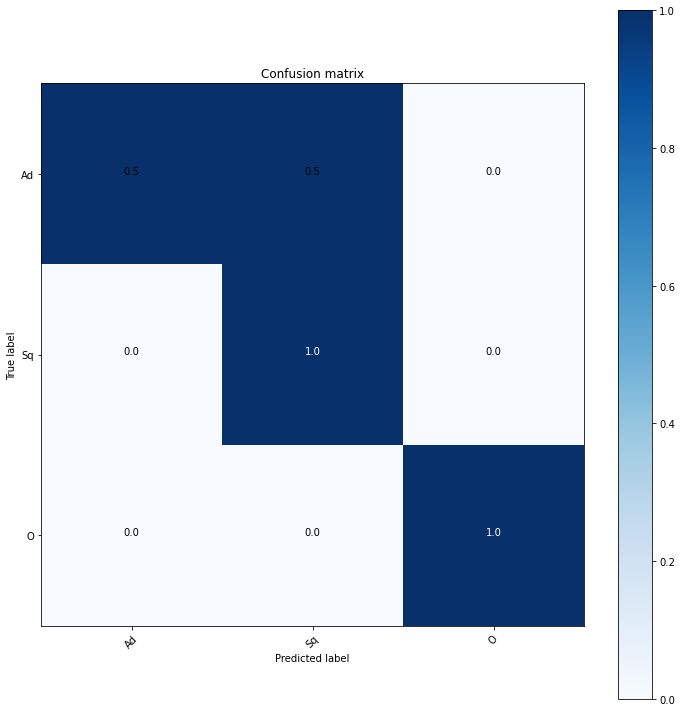

In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix([1, 0, 2, 0], [1, 0, 2, 1])
figure = plot_confusion_matrix(cm, class_names=['Ad','Sq','O'])
#np_im,_ = plt2arr(figure)
#print(np_im.shape)
#plt.imshow( torch.from_numpy(np_im[:,:,0:3]) )
#plt.show()


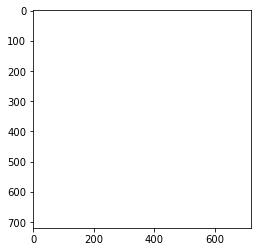

In [67]:
plt.imshow(np_im[:,:,0:3])
plt.show()

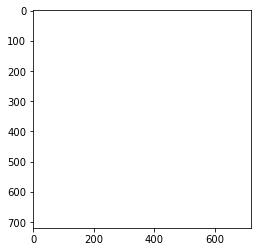

In [68]:
plt.imshow( torch.from_numpy(np_im[:,:,0:3]) )
plt.show()

In [74]:
figure.shape

AttributeError: 'Figure' object has no attribute 'shape'

In [75]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [89]:
print(plt.cm.cmap_d.keys())

KeysView(<matplotlib.cm._DeprecatedCmapDictWrapper object at 0x000002A591B69E50>)


In [106]:
cm=confusion_matrix([0, 0, 1,1,2, 0], [0, 1,0,1, 2, 1])
cm

array([[1, 2, 0],
       [1, 1, 0],
       [0, 0, 1]], dtype=int64)

In [123]:
a = np.array([0,0.2,1])
a[a==1]=0
a.mean()

0.06666666666666667

In [124]:
a = np.array([True,0.2,False])
a[a==1]=0

In [126]:
import pandas as pd

In [129]:
a = {'a':[2,3], 'b':[4,6]}
c = pd.DataFrame(a)

In [130]:
c

,a,b
0,2,4
1,3,6


In [133]:
[      0.5*(319+224)/(713+319+224)    ,     0.5*(713+224)/(713+319+224)       ,     0.5*(713+319)/(713+319+224)]

[0.2161624203821656, 0.3730095541401274, 0.410828025477707]

In [134]:
[5/24, 9/24,10/24]

[0.20833333333333334, 0.375, 0.4166666666666667]

In [135]:
[     0.5*(319+222)/(723+319+222)    ,     0.5*(723+222)/(723+319+222)    ,    0.5*(723+319)/(723+319+222)     ]

[0.21400316455696203, 0.3738132911392405, 0.41218354430379744]